## PHASE-4 PROJECT SUBMSISSION 
### GROUP-$ Members
Name :
- Edgar Kiprono
- Sarah Karanja
- Dennis Njogu,
- Alice Mumbi
- Moschini Onyango
- Brandon Muraya

Student pace: DS-full time-Online

Submission Date : 12/04/2024

### PROJECT-RECOMMENDATION SYSTEMS

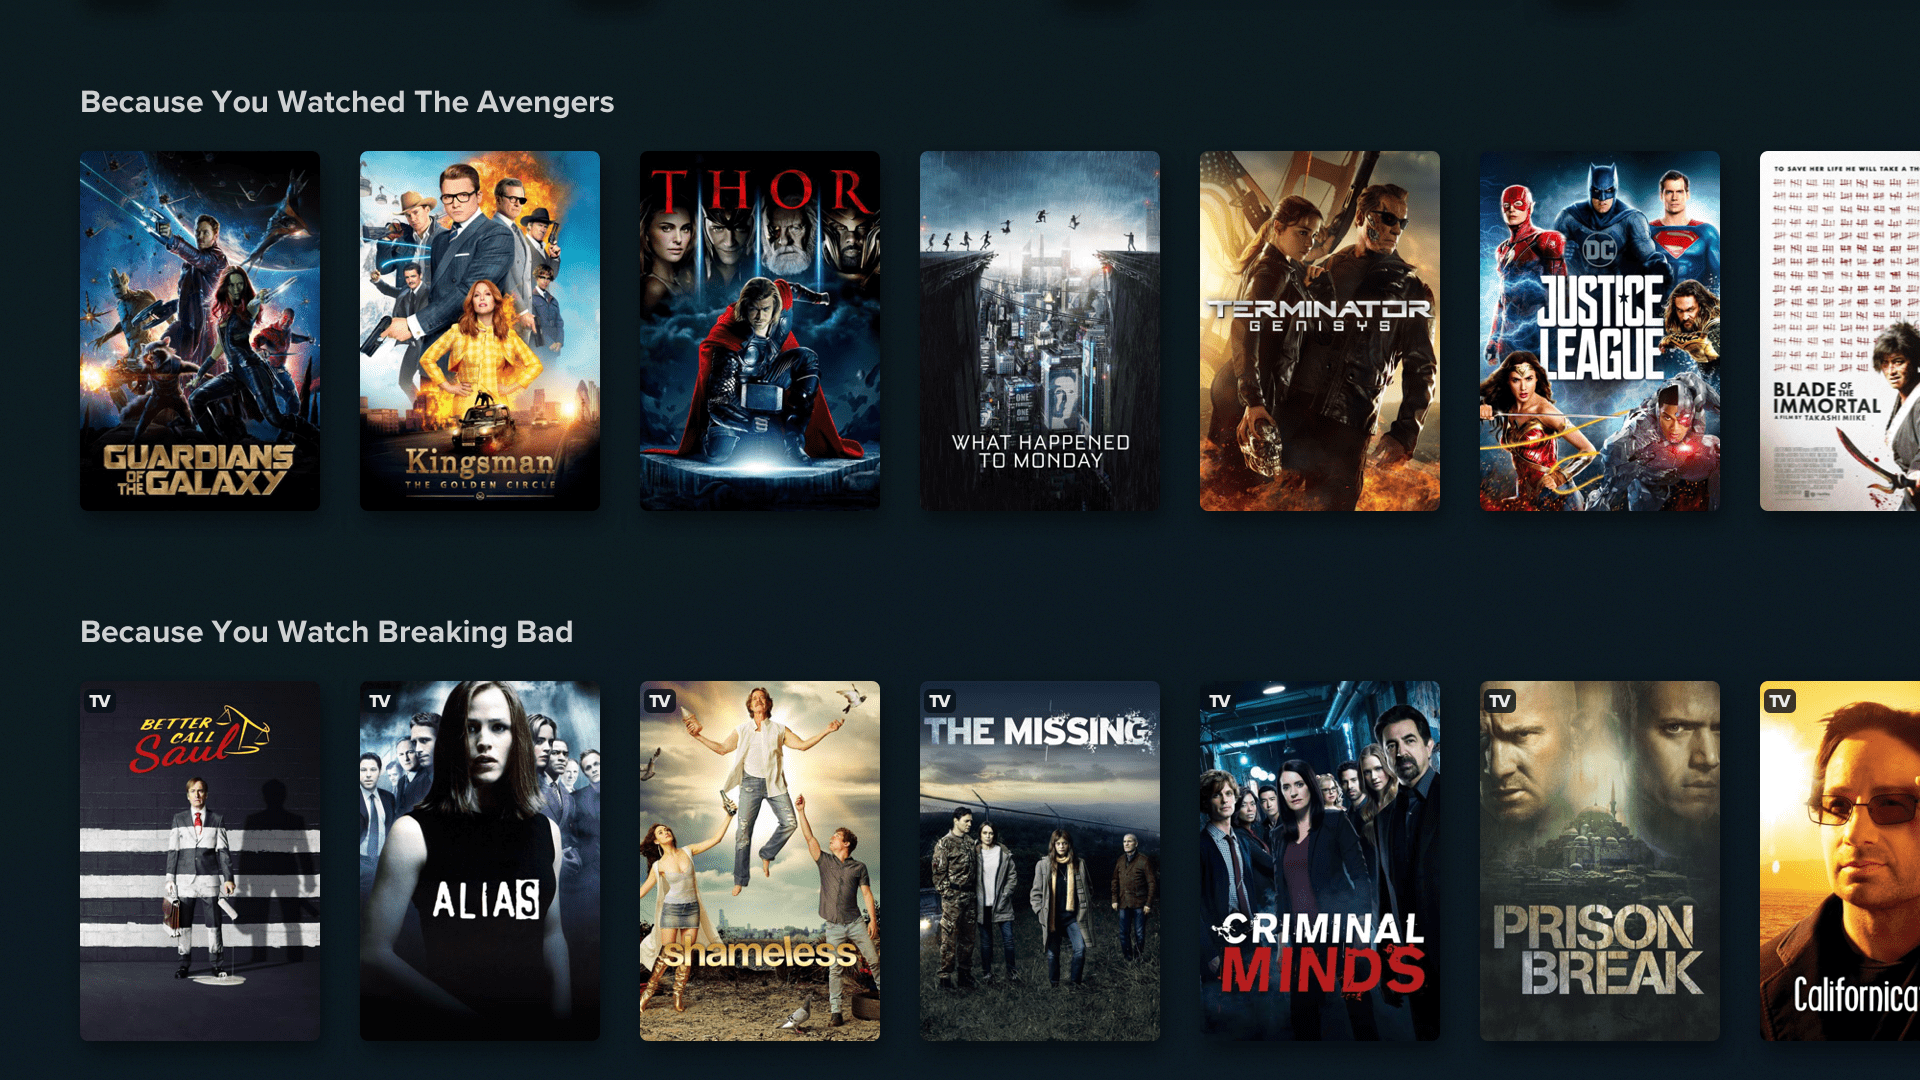

## Introduction

In a world filled with an endless stream of entertainment options, users are often left stranded in a sea of choices, paralyzed by decision overload when it comes to selecting movies. The quest for the perfect film aligned with individual tastes can feel like an elusive endeavor, leaving viewers frustrated and dissatisfied. Recognizing this pressing challenge, there emerges an urgent call for a transformative solution –a recommendation system that is like a smart guide through a maze of movies. A system that carefully explores all the available options and then suggests movies that match what you like. It's like having a friend who knows exactly what movies you'll enjoy and helps you find them easily."

Imagine a scenario where users are greeted with a curated list of top-notch movie recommendations, meticulously tailored to their tastes and preferences. Picture the excitement of discovering hidden cinematic gems or exploring new genres that captivate and enthrall. This project embarks on a journey to revolutionize the movie-watching experience, providing users with a personalized roadmap to cinematic bliss. By harnessing the power of cutting-edge technology and sophisticated algorithms, we aim to unlock a world of endless possibilities, enhancing user satisfaction and engagement with streaming platforms. Welcome to the future of movie recommendations – where every click opens the door to a world of cinematic delight.



### Business Understanding
In an era where user engagement and satisfaction are paramount, personalized recommendation systems have become indispensable tools for businesses seeking to thrive in the competitive landscape. At **`GiggleStream`**, we recognize the transformative potential of these systems to not only meet but exceed user expectations. Imagine a world where every click on our streaming platform is met with a tailored recommendation, guiding users on a journey of cinematic exploration perfectly aligned with their tastes and preferences. With our cutting-edge technology and innovative algorithms, we are poised to redefine the movie-watching experience, making each interaction a seamless blend of excitement and anticipation.

For stakeholders such as GiggleStream users thrilled with improving the companies systems and those invested in the success of GiggleStream, this project signifies more than just a technological endeavor – it represents a commitment to excellence and a dedication to providing unparalleled value to our users.By leveraging personalized movie recommendations, we aim to not only enhance user satisfaction but also drive increased viewer retention, platform usage, and revenue generation. Together, let's embark on this thrilling journey towards creating a recommendation system that sets new standards of excellence in the streaming industry, elevating the user experience to unprecedented heights.


### Problem Statement
To recommend top 5 movies based on customer ratings of other movies to money-team Co$ users 

## Why create a recommendation system
**Personalization**: Tailor recommendations to each user's preferences, behaviors, and interests, enhancing their overall experience and satisfaction with the platform.

**Enhanced Engagement**: Increase user engagement by providing relevant and compelling recommendations, encouraging users to spend more time interacting with the platform.

**Increased User Retention**: Improve user retention rates by offering personalized recommendations that keep users coming back to the platform for more content or products.

## Data Understanding
### Data source
The project data was outsourced from grouplens(https://grouplens.org/datasets/movielens/latest/).
The MovieLens dataset serves as the backbone for numerous academic papers and machine learning proofs-of-concept, owing to its rich and diverse nature. However, our endeavor is not merely academic; it's about addressing a real-world business problem within the context of recommending movies. Hence, in addition to crafting an efficient recommendation model.

To accomplish this, we delve into the renowned MovieLens dataset, a cornerstone in the realm of recommendation systems. While the dataset offers various subsets, we recommend utilizing the "small" dataset, which It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018. This subset provides a manageable yet comprehensive dataset to derive meaningful insights and build robust recommendation models.


The MovieLens dataset has 4 csv files 
- **Links csv** : Link csv files has 3 columns  - `movieId`   `imdbId`   `tmdbId`
- **movies csv** : movies csv files has 3 columns - `movieId`   `title`   `genre`
- **ratings csv** : ratings csv file has 4 columns - `userId`   `movieId`   `rating` `timestamp`
- **tags csv** : tags csv file has 4 columns -  `userId`   `movieId`   `tag` `timestamp`

### Data-sets understanding

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from surprise import KNNWithMeans, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import numpy as np
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [3]:
#read link csv file
data1 = pd.read_csv('Data/links.csv')
#show df shape
print(data1.shape)
#print top5 rows
data1.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
#read movie csv file
data2 = pd.read_csv('Data/movies.csv')
#print column/rows shape
print(data2.shape)
data2.head(5)

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
#read ratings csv file
data3 = pd.read_csv('Data/ratings.csv')
#show ratings shape
print(data3.shape)
data3.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
#read tags csc file
data4 = pd.read_csv('Data/tags.csv')
print(data4.shape)
data4.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
#finding null values in each dataframe
def display_missing_values(csv_file):
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Check for missing values
    missing_values = df.isna().sum()
    
    # Display missing values
    print("Missing values in", csv_file)
    print(missing_values)

#display the missing values
print(display_missing_values('Data/links.csv'))
print(display_missing_values('Data/movies.csv'))
print(display_missing_values('Data/ratings.csv'))
print(display_missing_values('Data/tags.csv'))

Missing values in Data/links.csv
movieId    0
imdbId     0
tmdbId     8
dtype: int64
None
Missing values in Data/movies.csv
movieId    0
title      0
genres     0
dtype: int64
None
Missing values in Data/ratings.csv
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
None
Missing values in Data/tags.csv
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
None


#### Merge files

In [64]:
#merge dataframes using movie ID
#merge links csv and movies csv
result = pd.merge(data1, data2, on='movieId', how='inner')
#merge result with ratings csv
result = pd.merge(result, data3, on='movieId', how='inner')

In [65]:
result.tail()

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp
100818,193581,5476944,432131.0,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100819,193583,5914996,445030.0,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100820,193585,6397426,479308.0,Flint (2017),Drama,184,3.5,1537109805
100821,193587,8391976,483455.0,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021
100822,193609,101726,37891.0,Andrew Dice Clay: Dice Rules (1991),Comedy,331,4.0,1537157606


In [66]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100823 entries, 0 to 100822
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


After merging we can see the dataset has no missing values

In [11]:
#checking for duplicated values
duplicates = result[result.duplicated()]
duplicates

,movieId,imdbId,tmdbId,title,genres,userId,rating,timestamp


No duplicates found

In [67]:
#dropping null values
result.dropna(inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100823 entries, 0 to 100822
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100823 non-null  int64  
 1   imdbId     100823 non-null  int64  
 2   tmdbId     100823 non-null  float64
 3   title      100823 non-null  object 
 4   genres     100823 non-null  object 
 5   userId     100823 non-null  int64  
 6   rating     100823 non-null  float64
 7   timestamp  100823 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 6.2+ MB


In [13]:
#checking for max and min rating
print("Maximum rating: ",result["rating"].max())
print("Minimum rating: ",result["rating"].min())

Maximum rating:  5.0
Minimum rating:  0.5


Movie ratings from the dataset range between 0.5 which is recorded as the lowest rating and 5.0 as the highest rating

In [69]:
#rate conts of the each rating
result["rating"].value_counts()

rating
4.0    26816
3.0    20044
5.0    13209
3.5    13134
4.5     8551
2.0     7550
2.5     5550
1.0     2811
1.5     1791
0.5     1367
Name: count, dtype: int64

From the provided analysis, it's evident that movies rated 4.0 have the highest count among all ratings. With a total of 26,816, representing approximately 28.3% of all rated movies, a rating of 4.0 stands out as the most common rating given by viewers. 

Movies with a rating of 0.5 are among the least common in the dataset, with a count of 1,367. A rating of 0.5 suggests that these movies have received extremely low ratings from viewers, indicating dissatisfaction or disappointment

In [15]:
#top ten movie titles
title_count = result["title"].value_counts()
title_count.head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64

These counts indicate how many times each movie title has received ratings within the dataset. It frequency of ratings for each movie, with higher counts indicating a higher number of ratings received. "Forrest Gump (1994)" has been rated the most frequently among all the movies in the dataset.Followed by Shawshank Redemption, The (1994) rated 317 times

In [16]:
#top 10 movie genres
genre_counts = result["genres"].value_counts().head(10)
genre_counts

genres
Comedy                       7194
Drama                        6290
Comedy|Romance               3967
Comedy|Drama|Romance         3000
Comedy|Drama                 2851
Drama|Romance                2838
Action|Adventure|Sci-Fi      2361
Crime|Drama                  2315
Action|Crime|Thriller        1554
Action|Adventure|Thriller    1455
Name: count, dtype: int64

Comedy genre constitute the largest category in the genres, with a significant count of 7194 movies. This indicates a strong presence of comedic content within the dataset, suggesting that comedy is a popular genre among viewers.

In [17]:
tag_counts = data4["tag"].value_counts().head(10)
tag_counts

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: count, dtype: int64

In Netflix queue (131 occurrences):
This tag suggests that the users have tagged certain movies with "In Netflix queue," indicating that they intend to watch these movies or have added them to their Netflix watchlist.

atmospheric (36 occurrences):
This tag indicates that certain movies are perceived to have a strong atmosphere or mood, often characterized by a particular ambiance or setting that enhances the viewer's experience.

thought-provoking (24 occurrences):
Movies tagged as "thought-provoking" are likely to stimulate deep thinking or contemplation among viewers, encouraging reflection on complex themes or ideas presented in the film.

### Visualizations

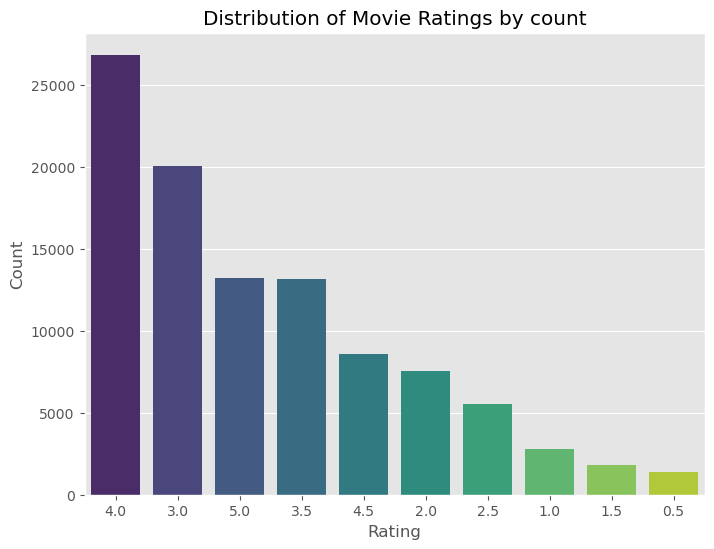

In [71]:
# Get the count of each rating
rating_counts = result['rating'].value_counts()

# Extract the ratings and sort them by count in ascending order
ratings_ordered_by_count = rating_counts.index.tolist()
plt.style.use("ggplot")
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=result, order=ratings_ordered_by_count, palette='viridis')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings by count")
plt.show()

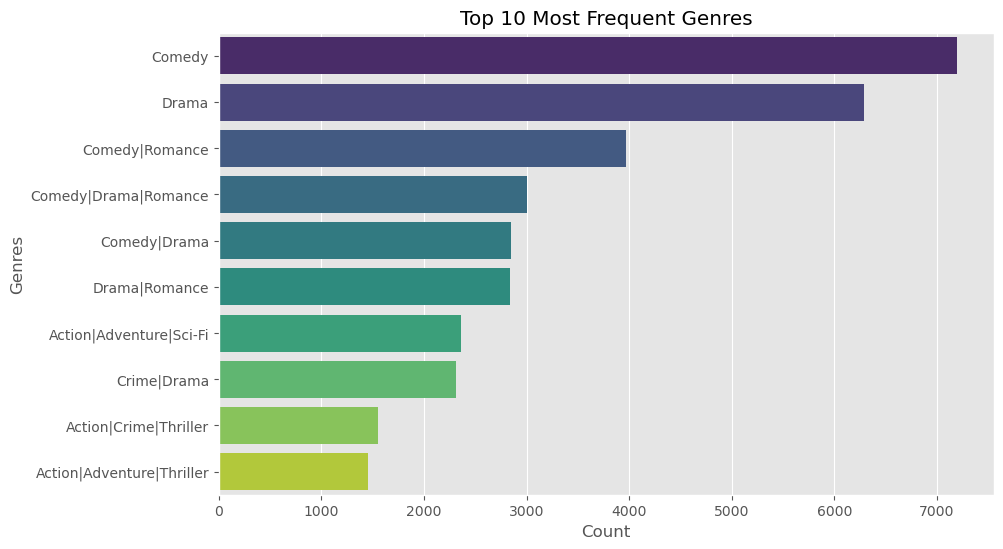

In [72]:
# top 10 most frequent genres
genre_counts = result["genres"].value_counts().head(10)
plt.style.use("ggplot")
# Plot the count of top 10 genres with genres on the y-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Genres")
plt.title("Top 10 Most Frequent Genres")
plt.show()


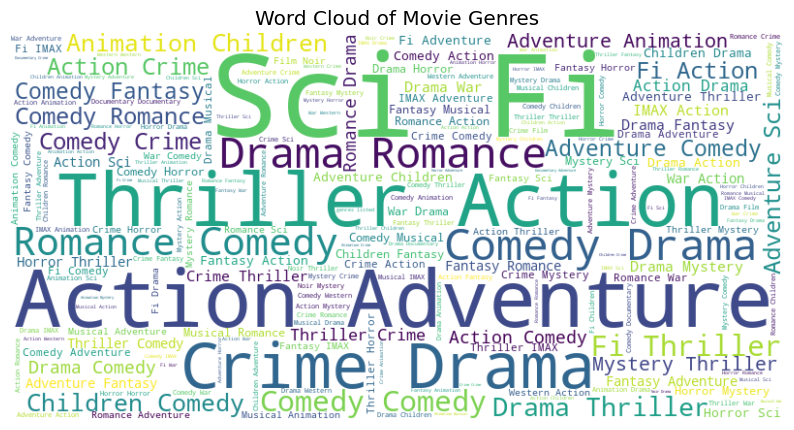

In [78]:
from wordcloud import WordCloud
# Combine all genres into a single string
genres_text = ' '.join(result['genres'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')  # Hide axis
plt.show()


This word cloud visually represents the frequency of words or phrases in the genre column, with the size of each word indicating its frequency .It provide insights into the popularity or prevalence of different genres based on their frequency of occurrence in the dataset. Action,Adventure,crime.Drama,Thriller and SCi-Fi appear to be the most frewuent genres

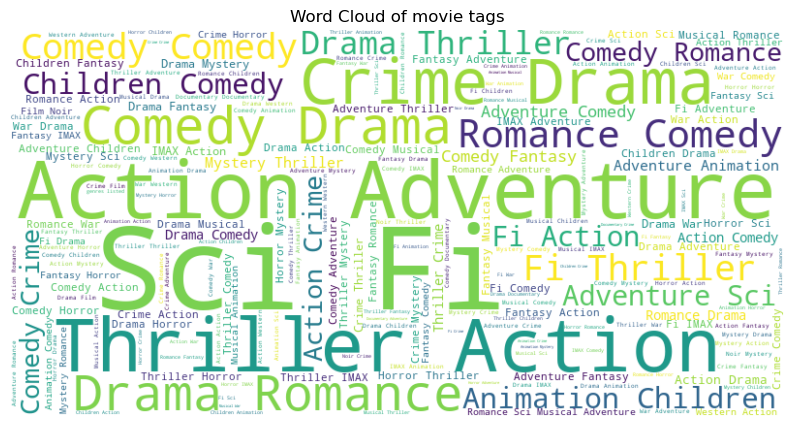

In [21]:
#wordcloud for tags word count
tags_text = ' '.join(data4['tag'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of movie tags')
plt.axis('off')  # Hide axis
plt.show()

This word cloud visually represents the frequency of words or phrases in the tags column, with the size of each word indicating its frequency. It provides insights into the popularity or prevalence of different movie tags based on their frequency of occurrence in the dataset.Action,Adventure.SCi=fi, Comedy,Drama and more appear to be the most frequent movie tags

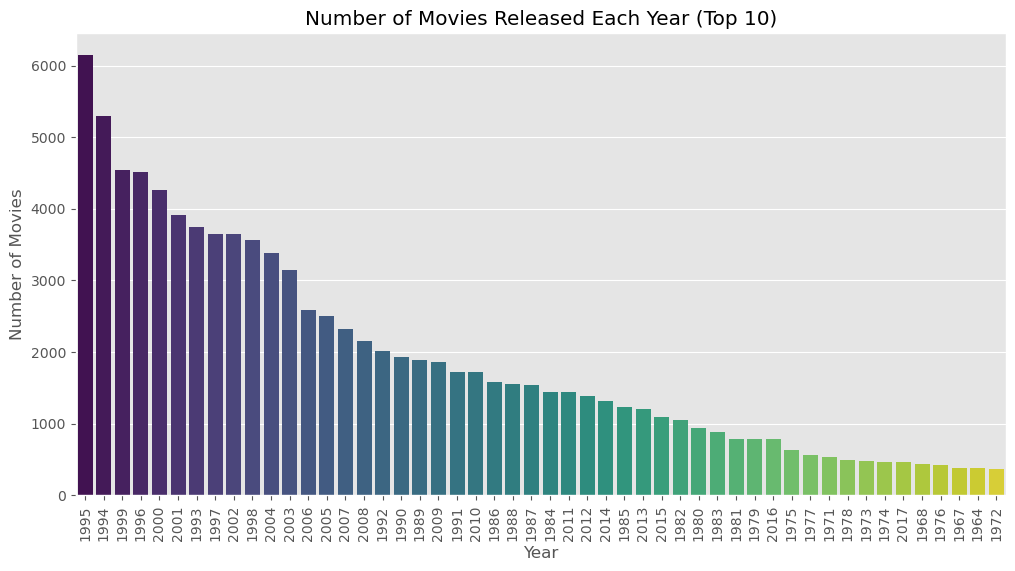

In [85]:
# Extracting the year from the title using regular expressions
result['year'] = result['title'].str.extract(r'\((\d{4})\)')

# top 10 years with the highest counts of movies
top_10_years = result['year'].value_counts().head(50)
plt.style.use("ggplot")
# Plotting the number of movies released in each of the top 40 years
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_years.index, y=top_10_years.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year (Top 10)')
plt.xticks(rotation=90)
plt.show()


From the plot above we can conclude that the highest number of movies were produced in 1995 with almost 6000+ movies followed by 1994. There has been a decline in number of movies being produced with the latest year 2018 not appearing in the top 50. This can significantly impact the recommendation system because it limits the options to provide to users

In [23]:
#top 10 user ratings counts
user_rating = result["userId"].value_counts()
user_rating

userId
414    2698
599    2478
474    2108
448    1863
274    1346
       ... 
53       20
207      20
431      20
442      20
189      20
Name: count, Length: 610, dtype: int64

From the user Id counts we can see user with user Id 414 appearing more frequently with a total count of 2698. This means that the user has rated more movies followed by user with user Id 599

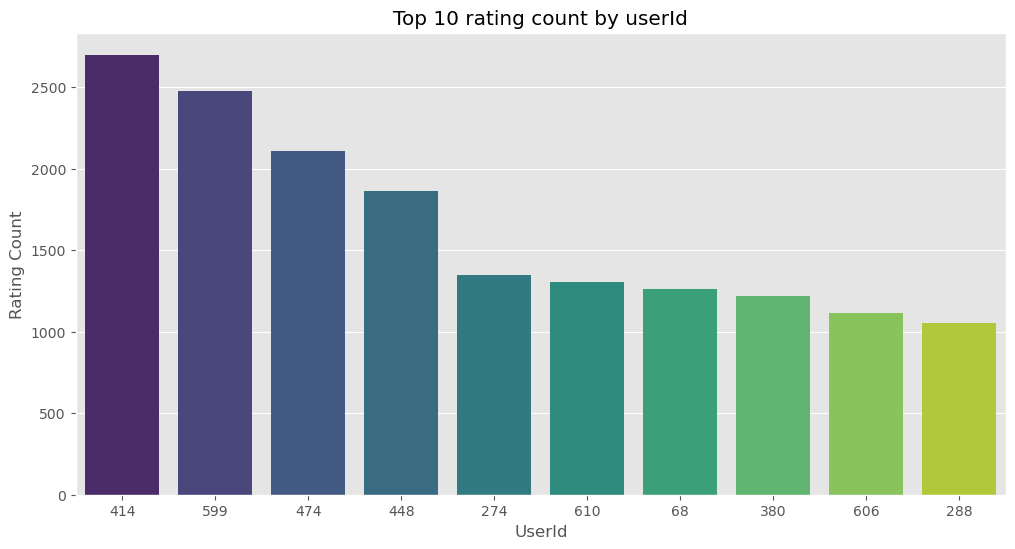

In [86]:
#top 10 userId ratings count
user_rating = result["userId"].value_counts().head(10)
user_ratings = user_rating.sort_values(ascending=False)  # Sort in ascending order

# Convert the index to strings to prioritize the order based on count values
user_ratings.index = user_ratings.index.astype(str)
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
sns.barplot(x=user_ratings.index, y=user_ratings.values, palette='viridis')

plt.xlabel('UserId')
plt.ylabel('Rating Count')
plt.title('Top 10 rating count by userId')
plt.xticks()
plt.show()

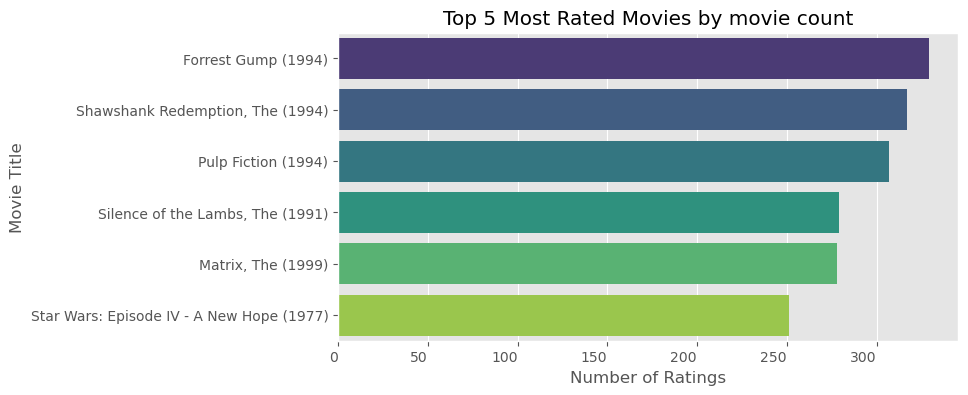

In [25]:
# Group by movie title and count the number of ratings
rating_counts = result.groupby('title')['rating'].count().sort_values(ascending=False).head(6)

# Visualizing with bar plot
plt.style.use("ggplot")
plt.figure(figsize=(8, 4))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="viridis")
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.title('Top 5 Most Rated Movies by movie count')
plt.xticks(ha='right')
plt.show()

Forest gump had the highest number of ratings

In [26]:
#Convert timestamp to datetime format with correct unit (seconds since the epoch)
result['timesatmp'] = pd.to_datetime(result['timestamp'], unit='s')
result["timesatmp"]

0        2000-07-30 18:45:03
1        1996-11-08 06:36:02
2        2005-01-25 06:52:26
3        2017-11-13 12:59:30
4        2011-05-18 05:28:03
                 ...        
100831   2018-09-16 14:44:42
100832   2018-09-16 14:52:25
100833   2018-09-16 14:56:45
100834   2018-09-16 15:00:21
100835   2018-09-17 04:13:26
Name: timesatmp, Length: 100823, dtype: datetime64[ns]

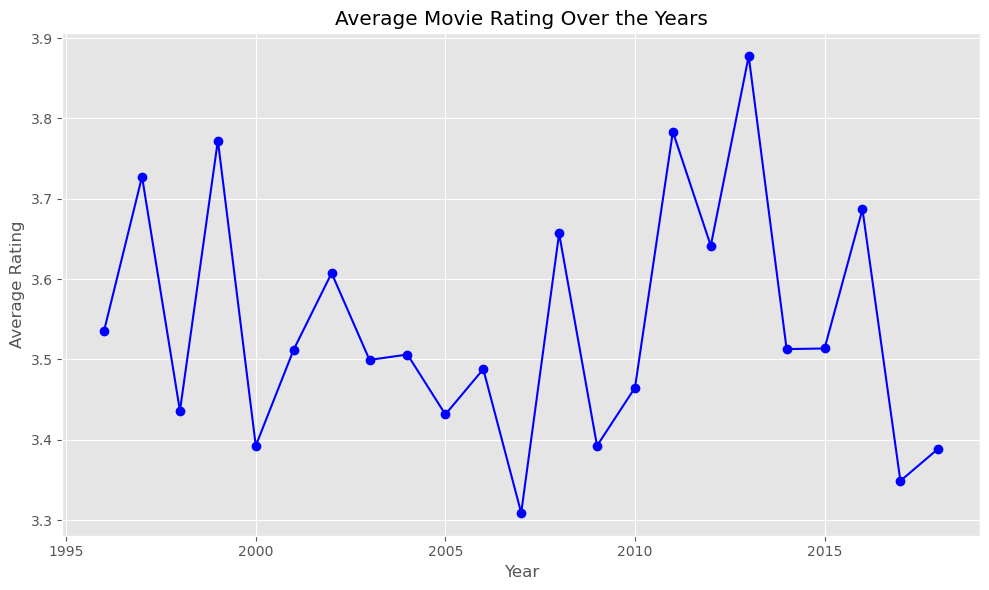

In [27]:
#Extract the year from the datetime column
result['year'] = result['timesatmp'].dt.year

#Aggregate ratings by year
ratings_by_year = result.groupby('year')['rating'].mean()

#Plot the time series
plt.figure(figsize=(10, 6))
ratings_by_year.plot(marker='o', linestyle='-',color='b')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

According to the time series graph and average user ratings per year there are great fluctuations with the highest average rating being in 2013 and the lowest average rating being in 2007

## Recommendation Models

### Collaborative Filtering model

In collaborative filtering, recommendations are made based on the past behavior of users and/or items. This particular code snippet appears to be preparing the data for collaborative filtering by converting the user-item ratings matrix into a sparse matrix format.

Collaborative filtering techniques can be further divided into two main types:

 __User-User Collaborative Filtering__: This approach recommends items to a target user based on the preferences of similar users. It computes similarities between users based on their past interactions with items and recommends items that similar users have liked or interacted with.

__Item-Item Collaborative Filtering__: In this approach, recommendations are made based on the similarity between items. It identifies items that are similar to the ones the user has interacted with in the past and recommends those similar items.

### Item-Item Collaborative Filtering

Create a pivot table from the result DataFrame. This pivot table is organized such that each row represents a unique user, each column represents a unique movie, and the values are the ratings given by each user to each movie

In [28]:
movie_recommendation = result.pivot(index='userId', columns='movieId', values='rating').fillna(0)
movie_recommendation

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The movie_recommendation DataFrame is converted into a sparse matrix format using csr_matrix from scipy.sparse. This step is essential for memory efficiency when dealing with large datasets.

.fillna(0):fills any missing values in the pivot table with 0. Missing values typically occur when a user has not rated a particular movie, and filling them with 0 indicates that the user has not rated that movie.

In [29]:
# convert the movie_recommendation DataFrame into a sparse matrix format 
movies_df_metrix= csr_matrix(movie_recommendation.values)

In [88]:
# find the  nearest neighbors based on cosine similarity.
model_knn= NearestNeighbors(metric= 'cosine', algorithm='brute')

# Fit the NearestNeighbors model to the movies_df_metrix sparse matrix. 
model_knn.fit(movies_df_metrix)

NearestNeighbors(algorithm='brute', metric='cosine')

Cosine similarity measures the similarity between data points.

In [31]:
# selects a row from the movie_recommendation matrix and then finds the nearest neighbors 
#of that selected row using the fitted k-nearest neighbors (KNN) model.
# Specify the user ID (row index)
user_id = 17

# Now we will try to find the movies related to the specified user
distances, indices = model_knn.kneighbors(movie_recommendation.loc[user_id, :].values.reshape(1, -1), n_neighbors=6)


1).Selects a random index representing a row from the movie_recommendation matrix. This index corresponds to a random user or movie.

2).Uses the fitted KNN model to find the nearest neighbors of the randomly selected row.

3).Selects the row corresponding to the randomly chosen movie/user from the movie_recommendation matrix.

4).Reshapes the selected row into a 2D array with a single row, which is required as input for the kneighbors method.

In [32]:
# Print recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendations for user_id {user_id}:\n')
    else:
        print(f'{i}: {movie_recommendation.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}:')


Recommendations for user_id 17:

1: 16, with distance of 0.5439043852448859:
2: 400, with distance of 0.547681477784623:
3: 434, with distance of 0.5476964525679999:
4: 247, with distance of 0.5610873824355529:
5: 399, with distance of 0.5858039764574902:


Here we have used cosine similarity to find similar movies to recommend to the users. Therefore, nearest neighbors are those data points that have minimum distance in feature space from our new data point.

- Movie ID: 16, Title: [Title of Movie 16], Distance: 0.5439

This movie has a relatively closer similarity to the user's preferences compared to others.
- The distance increases from the top recommended movie to the next recommended movie

In [33]:
# Print recommendations
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for user_Id {0}:\n'.format(user_id))
    else:
        movie_title = result.loc[movie_recommendation.index[indices.flatten()[i]], 'title']  # Get the movie title
        print('{0}: {1}, with distance of {2}:'.format(i, movie_title, distances.flatten()[i]))


Recommendations for user_Id 17:

1: Toy Story (1995), with distance of 0.5439043852448859:
2: Father of the Bride Part II (1995), with distance of 0.547681477784623:
3: Heat (1995), with distance of 0.5476964525679999:
4: Jumanji (1995), with distance of 0.5610873824355529:
5: Father of the Bride Part II (1995), with distance of 0.5858039764574902:


### Hyperparameter Tuning for item based

### Person Similarity

__Pearson Correlation__: Is also commonly used method for computing similarity. It ranges from [-1, 1] and it represents the linear correlation between two vectors. A correlation value of 0 represents no relationship, -1 represents a high negative correlation and +1 represents high positive correlation

In [92]:
# Load the dataset (replace 'path_to_dataset' with the actual path)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Define the model with Pearson correlation as the similarity metric
model = KNNWithMeans(sim_options={'name': 'pearson', 'user_based': False})

# Train the model
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9085


0.9084850102962825


The item-based collaborative filtering model, utilizing Pearson correlation as the similarity metric, achieved an RMSE (Root Mean Square Error) of approximately 0.8999 on the test dataset. This indicates the average difference between the actual ratings and the predicted ratings by the model. A lower RMSE value suggests better performance in predicting user preferences for movies.

In [94]:
# Select a random user
user_id = np.random.choice(movie_recommendation.shape[0])

# Find the nearest neighbors for the selected user
distances, indices = model_knn.kneighbors(movie_recommendation.iloc[user_id, :].values.reshape(1, -1), n_neighbors=6)

# Print recommendations
print(f'Recommendations for user_id {user_id}:\n')
for i in range(1, len(distances.flatten())):
    movie_index = indices.flatten()[i]
    movie_title = movie_recommendation.index[movie_index]
    print(f'{i}: Movie Title: {movie_title}, with distance of {distances.flatten()[i]}:')

Recommendations for user_id 351:

1: Movie Title: 249, with distance of 0.5925699625158605:
2: Movie Title: 279, with distance of 0.6085155051411337:
3: Movie Title: 62, with distance of 0.6129642043501078:
4: Movie Title: 305, with distance of 0.6307237579303528:
5: Movie Title: 247, with distance of 0.6384368699831288:


### User-User collaborative filtering

This approach recommends items to a target user based on the preferences of similar users.

In [ ]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset 
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use Pearson correlation similarity metric )
sim_options = {'name': 'pearson'}

# Initialize the user-user collaborative filtering model
model = KNNBasic(sim_options=sim_options)

# Train the model
model.fit(trainset)

# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the model
accuracy.rmse(predictions)

# Generate recommendations for a specific user (replace 'user_id' with the actual user ID)
user_id = 17
user_recommendations = model.get_neighbors(user_id, k=5)

print("Top 5 similar users for user", user_id, ":", user_recommendations)


### user-item collaborative filtering recommendation system 

a user-item collaborative filtering recommendation system using the Singular Value Decomposition (SVD) algorithm

In [42]:
# Load and Prepare the Data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(result[['userId', 'movieId', 'rating']], reader)

# Split the Data into Train and Test Sets
trainset, testset = train_test_split(data, test_size=0.2)

#Train the Collaborative Filtering Model
model = SVD()  # Singular Value Decomposition
model.fit(trainset)

# Step 4: Make Predictions
predictions = model.test(testset)

In [44]:
# Generate Recommendations
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Get top 5 recommendations for user with ID 'user_id'
user_id = 7 
user_top_5_recommendations = get_top_n_recommendations(predictions, n=5)[user_id]

# list of movie Recommendations
for movie_id, estimated_rating in user_top_5_recommendations:
    movie_title = result[result['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie: {movie_title}, Estimated Rating: {estimated_rating}")


Movie: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964), Estimated Rating: 4.189849270948891
Movie: Catch Me If You Can (2002), Estimated Rating: 3.8985772155560885
Movie: Sixth Sense, The (1999), Estimated Rating: 3.5959141231869496
Movie: 2001: A Space Odyssey (1968), Estimated Rating: 3.4770301619684227
Movie: Enemy of the State (1998), Estimated Rating: 3.465206325153859


This recommendation model demonstrate the effectiveness of the user-item collaborative filtering model in identifying movies that align with the preferences of user 7. By analyzing the user's past ratings and similarities with other users, the model can accurately predict ratings for unseen movies and provide personalized recommendations tailored to the user's interests.

### Recommendation model with Surprise

How does the surprise recommendation work

- User is prompted to rate different movies based on users preferred genre
- Obtain a prediction for a specific user for a particular item 
- Introduce a new user with rating to a rating matrix and make recommendations for the user
- Return the top n recommendations for a user 

In [45]:
#checking the dataset colums
result.columns

Index(['movieId', 'imdbId', 'tmdbId', 'title', 'genres', 'userId', 'rating',
       'timestamp', 'year', 'timesatmp'],
      dtype='object')

In [46]:
#selecting columns to use in the system
new_df = result[['userId', 'movieId', 'rating','title','genres']]
new_df.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


Transforming the dataset into something compatible with surprise.

In [47]:
# Create a reader
reader = Reader()
#  columns in the DataFrame (user_id, movieId, rating)
columns = ['userId', 'movieId', 'rating']

# Load data from DataFrame into Surprise Dataset
data = Dataset.load_from_df(new_df[columns], reader)
data

Let's look at how many users and items we have in our dataset. If using neighborhood-based methods, this will help us determine whether or not we should perform user-user or item-item similarity

In [48]:
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of movies: ', dataset.n_items)

Number of users:  610 

Number of movies:  9716


Comparing the different models such as KNN cross validationand see which ones perform best. For consistency sake we used RMSE to evaluate models.

In [49]:
#testing for different params
param_grid = {'n_factors':[20,30,60, 100],
              'reg_all': [0.02, 0.04,1]}

gs_model = GridSearchCV(SVD,param_grid=param_grid,n_jobs = -1)
gs_model.fit(data)
print(gs_model.best_score)
print(gs_model.best_params)

{'rmse': 0.869268178033354, 'mae': 0.6678121607436849}
{'rmse': {'n_factors': 60, 'reg_all': 0.04}, 'mae': {'n_factors': 100, 'reg_all': 0.04}}


Based on the provided grid search results:

For RMSE:

The best RMSE achieved is approximately 0.8692.
The best combination of hyperparameters for RMSE is when n_factors is 60 and reg_all is 0.04.

In [50]:
# cross validating with KNNBasic
knn_basic = KNNBasic(sim_options={'name':'pearson', 'user_based':True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)

for i in cv_knn_basic.items():
    print(i)
print('-----------------------')
print(np.mean(cv_knn_basic['test_rmse']))

('test_rmse', array([0.97899274, 0.96844809, 0.96873089, 0.97889409, 0.97091694]))
('test_mae', array([0.75786641, 0.74954946, 0.74640896, 0.75586446, 0.75104704]))
('fit_time', (1.0478577613830566, 1.0946018695831299, 1.0790953636169434, 1.0166120529174805, 0.7138965129852295))
('test_time', (2.593459367752075, 2.6608777046203613, 2.6717875003814697, 2.6249282360076904, 1.3363900184631348))
-----------------------
0.9731965497123591


Test RMSE

The mean test RMSE across the cross-validation folds is approximately 0.9707.
Training Fit Time:

The mean fit time across the cross-validation folds is around 1.0546 seconds.

In [51]:
sim_pearson = {'name':'pearson', 'user_based':True}
knn_baseline = KNNBaseline(sim_options=sim_pearson)
cv_knn_baseline = cross_validate(knn_baseline,data)

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.


In [52]:
# print out the average score for the test set
for i in cv_knn_baseline.items():
    print(i)

np.mean(cv_knn_baseline['test_rmse'])

('test_rmse', array([0.88091938, 0.87088605, 0.87604486, 0.873585  , 0.87996733]))
('test_mae', array([0.67164344, 0.66664379, 0.66831391, 0.67039811, 0.67087563]))
('fit_time', (0.9307925701141357, 0.954564094543457, 0.9483277797698975, 0.952113151550293, 0.9413225650787354))
('test_time', (2.2660040855407715, 2.146392345428467, 2.1106998920440674, 2.3518941402435303, 2.1908280849456787))


0.8762805241510723

In [53]:
selected_columns = result[['movieId', 'title', 'genres']]
selected_columns.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [54]:
svd = SVD(n_factors= 60, reg_all=0.04)
svd.fit(dataset)
svd.predict(2, 4)

Prediction(uid=2, iid=4, r_ui=None, est=2.9016250383034103, details={'was_impossible': False})

The first step is to create a function that allows us to pick randomly selected movies. The function should present users with a movie and ask them to rate it. If they have not seen the movie, they should be able to skip rating it.

In [55]:
#defining function to prompt the user to rate movies 
def movie_rater(movie_df,num, genre=None):
    userID = 100
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen :\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId':userID,'movieId':movie['movieId'].values[0],'rating':rating}
            rating_list.append(rating_one_movie) 
            num -= 1
    return rating_list

In [56]:
# try out the new function here!
user_rating = movie_rater(selected_columns, 5, 'Comedy')

       movieId                  title  genres
12428      445  Fatal Instinct (1993)  Comedy


How do you rate this movie on a scale of 1-5, press n if you have not seen :
 2


       movieId             title  genres
60112     4080  Baby Boom (1987)  Comedy


How do you rate this movie on a scale of 1-5, press n if you have not seen :
 3


       movieId                  title        genres
13576      500  Mrs. Doubtfire (1993)  Comedy|Drama


How do you rate this movie on a scale of 1-5, press n if you have not seen :
 4


       movieId             title  genres
46646     2694  Big Daddy (1999)  Comedy


How do you rate this movie on a scale of 1-5, press n if you have not seen :
 5


       movieId           title          genres
61853     4361  Tootsie (1982)  Comedy|Romance


How do you rate this movie on a scale of 1-5, press n if you have not seen :
 3


In [59]:
user_rating

[{'userId': 100, 'movieId': 445, 'rating': '2'},
 {'userId': 100, 'movieId': 4080, 'rating': '3'},
 {'userId': 100, 'movieId': 500, 'rating': '4'},
 {'userId': 100, 'movieId': 2694, 'rating': '5'},
 {'userId': 100, 'movieId': 4361, 'rating': '3'}]

In [ ]:
This displays how a user has rated different movies 

In [60]:
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([new_df, user_ratings], axis=0)
new_data = Dataset.load_from_df(new_df[['userId', 'movieId', 'rating']], reader)

# train a model using the new combined DataFrame
svd_ = SVD(n_factors= 60, reg_all=0.04)
svd_.fit(new_data.build_full_trainset())

# make predictions for the user
list_of_movies = []
for m_id in new_df['movieId'].unique():
    list_of_movies.append( (m_id,svd_.predict(1000,m_id)[3]))

ranked_movies = sorted(list_of_movies, key=lambda x:x[1], reverse=True)

# return the top n recommendations using the 
def recommended_movies(recommendations, df, n):
    for idx, rec in enumerate(recommendations):
        title = df.loc[df['movieId'] == int(rec[0])]['title'].iloc[0]
        print('Recommendation #', idx+1, ':', title)
        n -= 1
        if n == 0:
            break

# Example usage:
recommended_movies(ranked_movies, new_df, 5,)

Recommendation # 1 : Shawshank Redemption, The (1994)
Recommendation # 2 : Lawrence of Arabia (1962)
Recommendation # 3 : Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
Recommendation # 4 : Streetcar Named Desire, A (1951)
Recommendation # 5 : Philadelphia Story, The (1940)
